In [1]:
import sys
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000, 28 * 28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels), 10))

for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28 * 28) / 255
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed()
alpha = 0.005
max_iterations = 10
input_layer_size = len(images[0])
hidden_layer_size = 100
output_layer_size = 10

weights_0_1 = 0.2 * np.random.random((input_layer_size, hidden_layer_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_layer_size, output_layer_size)) - 0.1

relu = lambda x: (x > 0) * x
relu_deriv = lambda x: x >= 0

for iteration in range(max_iterations):
    error_prediction = 0
    correct_cnt = 0
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        
        error_prediction += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2)) == np.argmax(labels[i:i+1])
        
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu_deriv(layer_1)
        
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    sys.stdout.write("\r" + \
                     " Iteration: " + str(iteration) + \
                     " Error: " + str(error_prediction / float(len(images)))[0:5] + \
                     " Correct: " + str(correct_cnt / float(len(images)))
    )

 Iteration: 9 Error: 0.279 Correct: 0.915

3


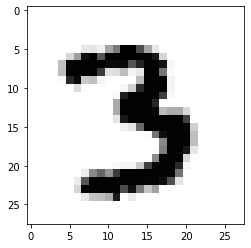

In [31]:
index = 500
layer_0 = test_images[index]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)
print(np.argmax(layer_2))
plt.imshow(x_test[index], cmap='Greys')

In [37]:
if ((iteration % 10 == 0) or (iteration == max_iterations - 1)):
    error_prediction = 0
    correct_cnt = 0
    
    for i in range(len(test_images)):
        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        
        error_prediction += np.sum((test_labels[i:i+1] - layer_2) ** 2) 
        correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
sys.stdout.write("\r" + \
                 " Error: " + str(error_prediction / float(len(test_images)))[0:5] + \
                 " Correct: " + str(correct_cnt / float(len(test_images)))
)

 Error: 0.401 Correct: 0.8291